In [1]:
import tensorflow as tf # ML library for graphs

c:\users\muhammed buyukkinaci\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Importing libraries
import cv2                 # image processing
import numpy as np         # mathematical operations
import os                  # working with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice progress bar for loops

TRAIN_DIR = 'C:\\Users\\Muhammed Buyukkinaci\\python\\images\\multiclass_classification\\training'
TEST_DIR = 'C:\\Users\\Muhammed Buyukkinaci\\python\\images\\multiclass_classification\\testing'
IMG_SIZE = 80# our images are 80x80x3

In [3]:
os.getcwd()

'C:\\Users\\Muhammed Buyukkinaci\\python\\images\\multiclass_classification'

In [4]:
#Converting the output into one-hot format
def label_img(img):
    word_label = img.split('_')[0]
    if word_label == 'chair': return [1,0,0,0]
    elif word_label == 'kitchen': return [0,1,0,0]
    elif word_label == 'knife': return [0,0,1,0]
    elif word_label == 'saucepan': return [0,0,0,1]

In [5]:
#A function to read training images from folder
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = TRAIN_DIR + '\\' + img
        img = cv2.imread(path,1)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data_mc.npy', training_data)
    return training_data

In [6]:
#If you are reading images, make the line below uncomment
#train_data = create_train_data()
#If you are reading .npy file, use the line below.
train_data = np.load('train_data_mc.npy')

In [7]:
#A function to read testing images from folder
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        label = label_img(img)
        path = TEST_DIR + '\\' + img
        img = cv2.imread(path,1)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img),label])       
    shuffle(testing_data)
    np.save('test_data_mc.npy', testing_data)
    return testing_data

In [8]:
#If you are reading images, make the line below uncomment.

#test_data = process_test_data()

#If you are reading .npy file, use the line below.
test_data = np.load('test_data_mc.npy')

In [9]:
#For visualizations
import matplotlib.pyplot as plt

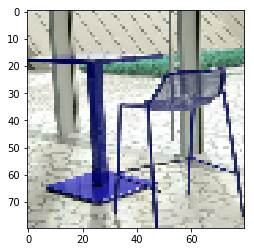

In [10]:
#A CHAIR
plt.imshow(np.array(train_data[180][0]))

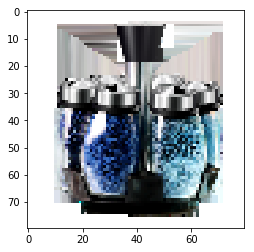

In [11]:
#A KITCHEN
plt.imshow(np.array(train_data[100][0]))

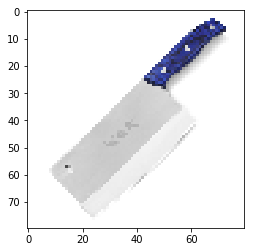

In [12]:
# A KNIFE
plt.imshow(np.array(train_data[111][0]))

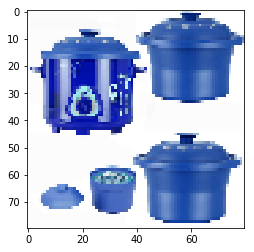

In [13]:
# A SAUCEPAN
plt.imshow(np.array(train_data[154][0]))

In [14]:
#Splitting into Training and CV datasets
train = train_data[:4800]
cv = train_data[4800:]

In [15]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = np.array([i[1] for i in train])

cv_x = np.array([i[0] for i in cv]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
cv_y = np.array([i[1] for i in cv])

In [16]:
test_x = np.array([i[0] for i in test_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_y = np.array([i[1] for i in test_data])

In [17]:
print(X.shape)

(4800, 80, 80, 3)


In [18]:
print(Y[2],type(Y[2]))

[0 0 0 1] <class 'numpy.ndarray'>


In [19]:
cv_x.shape

(400, 80, 80, 3)

In [20]:
test_x.shape

(1267, 80, 80, 3)

In [21]:
#HYPERPARAMETERS
steps = 4800
epochs = 2
step_size = 16
total_batch = int(steps/step_size)
LR = 0.00001

In [22]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [23]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [24]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [25]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [26]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

In [27]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [28]:
print(X[5].shape)

(80, 80, 3)


# GRAPH

In [29]:
#Resetting the graph
tf.reset_default_graph()

In [30]:
#Defining placeholders
x = tf.placeholder(tf.float32,shape=[None,80,80,3])
y_true = tf.placeholder(tf.float32,shape=[None,4])

In [31]:
#Defining the graph
with tf.name_scope('Model'):
    convo_1 = convolutional_layer(x,shape=[4,4,3,32])
    convo_1_pooling = max_pool_2by2(convo_1)
    convo_2 = convolutional_layer(convo_1_pooling,shape=[4,4,32,16])
    convo_2_pooling = max_pool_2by2(convo_2)
    convo_3 = convolutional_layer(convo_2_pooling,shape=[4,4,16,8])
    convo_3_pooling = max_pool_2by2(convo_3)
    convo_4 = convolutional_layer(convo_3_pooling,shape=[4,4,8,4])
    convo_4_pooling = max_pool_2by2(convo_4)
    convo_2_flat = tf.reshape(convo_4_pooling,[-1,5*5*4])
    
    full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,80))
    hold_prob1 = tf.placeholder(tf.float32)
    full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob1)
    
    full_layer_two = tf.nn.relu(normal_full_layer(full_one_dropout,40))
    hold_prob2 = tf.placeholder(tf.float32)
    full_two_dropout = tf.nn.dropout(full_layer_two,keep_prob=hold_prob2)
                                     
    full_layer_three = tf.nn.relu(normal_full_layer(full_two_dropout,20))
    hold_prob3 = tf.placeholder(tf.float32)
    full_three_dropout = tf.nn.dropout(full_layer_three,keep_prob=hold_prob3)
    
    full_layer_four = tf.nn.relu(normal_full_layer(full_three_dropout,10))
    hold_prob4 = tf.placeholder(tf.float32)
    full_four_dropout = tf.nn.dropout(full_layer_four,keep_prob=hold_prob4)
    
    y_pred = normal_full_layer(full_four_dropout,4)

In [32]:
#Defining Loss Function
with tf.name_scope('Loss'):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y_pred))

In [33]:
#Defining objectve
with tf.name_scope('ADAM'):
    train = tf.train.AdamOptimizer(learning_rate=LR).minimize(cross_entropy)

In [34]:
#Defining Accuracy
with tf.name_scope('Accuracy'):
    matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))

In [35]:
#Starting variables
init = tf.global_variables_initializer()

In [36]:
tf.summary.scalar("loss", cross_entropy)
tf.summary.scalar("accuracy", acc)
merged_summary_op = tf.summary.merge_all()

In [37]:
#Defining empty lists to keep results
acc_list = []
cross_entropy_list = []
acc_train = []

In [38]:
#Creating a Saver object to save results
saver = tf.train.Saver()

In [39]:
%%time
#Changing settings for GPU running.
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
config.gpu_options.allocator_type = 'BFC'
#Training and saving the result
with tf.Session(config=config) as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter(TRAIN_DIR, graph=tf.get_default_graph())
    for i in range(epochs):
        for j in range(0,steps,step_size):            
            _ , c , summary,d = sess.run([train,cross_entropy,merged_summary_op,acc],feed_dict={x:X[j:j+step_size] , y_true:Y[j:j+step_size] ,hold_prob1:0.5,hold_prob2:0.5,hold_prob3:0.5,hold_prob4:0.5})
            summary_writer.add_summary(summary, i * total_batch + j)
            acc_train.append(d)
            mean_of_cross_entropy = sess.run(cross_entropy,feed_dict={x:cv_x,y_true:cv_y ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0})
            mean_of_acc = sess.run(acc,feed_dict={x:cv_x ,y_true:cv_y ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0})
            cross_entropy_list.append(mean_of_cross_entropy)
            acc_list.append(mean_of_acc)
        print(i,mean_of_cross_entropy,mean_of_acc)
    saver.save(sess, os.getcwd()+"\\CNN_MC.ckpt")
    print("test accuracy = ",np.mean([sess.run(acc,feed_dict={x:test_x[:400],y_true:test_y[:400] ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0}),sess.run(acc,feed_dict={x:test_x[400:800],y_true:test_y[400:800] ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0}),sess.run(acc,feed_dict={x:test_x[800:],y_true:test_y[800:] ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0})]))   
    print("cross_entropy loss = ",np.mean([sess.run(cross_entropy,feed_dict={x:test_x[:400],y_true:test_y[:400] ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0}),sess.run(cross_entropy,feed_dict={x:test_x[400:800],y_true:test_y[400:800] ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0}),sess.run(cross_entropy,feed_dict={x:test_x[800:],y_true:test_y[800:] ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0})]))   

0 1.3824772 0.3025
1 1.3801208 0.2975
test accuracy =  0.21138115
cross_entropy loss =  1.3942465
Wall time: 2min 30s


In [41]:
#Importing pandas to plot results
import pandas as pd

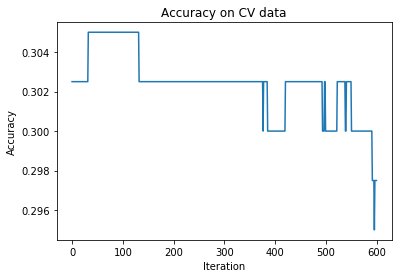

In [42]:
#Plotting the Accuracy
pd.Series(acc_list).plot(kind='line',title='Accuracy on CV data')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()

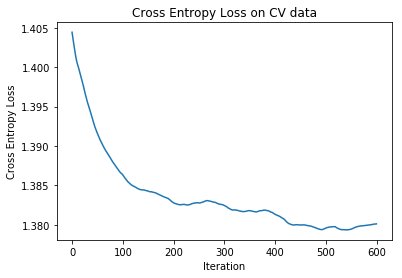

In [43]:
#Plotting the Cross Entropy Loss on CV data
pd.Series(cross_entropy_list).plot(kind='line',title='Cross Entropy Loss on CV data')
plt.xlabel("Iteration")
plt.ylabel("Cross Entropy Loss")
plt.show()

# Restoring Saved Model and making prediction for 1st test image

In [44]:
with tf.Session() as session:
    saver.restore(session, "CNN_MC.ckpt")
    print("Model restored.") 
    print('Initialized')
    k = session.run([y_pred], feed_dict={x:test_x[0:1] , hold_prob1:1,hold_prob2:1,hold_prob3:1,hold_prob4:1})
    print(k)

INFO:tensorflow:Restoring parameters from CNN_MC.ckpt
Model restored.
Initialized
[array([[0.14639977, 0.12047688, 0.08659527, 0.04386072]], dtype=float32)]


In [45]:
chair,kitchen,knife,saucepan = k[0][0][0],k[0][0][1],k[0][0][2],k[0][0][3]

In [46]:
print(chair,kitchen,knife,saucepan)

0.14639977 0.12047688 0.08659527 0.04386072


In [47]:
chair_exp = np.exp(chair)
kitchen_exp = np.exp(kitchen)
knife_exp = np.exp(knife)
saucepan_exp = np.exp(saucepan)

In [48]:
chair_prob = chair_exp / (chair_exp + kitchen_exp + knife_exp + saucepan_exp)
kitchen_prob = kitchen_exp /(chair_exp + kitchen_exp + knife_exp + saucepan_exp)
knife_prob = knife_exp /(chair_exp + kitchen_exp + knife_exp + saucepan_exp)
saucepan_prob = saucepan_exp / (chair_exp + kitchen_exp + knife_exp + saucepan_exp)

In [49]:
print("Chair_prob %s, Kitchen_prob %s Knife prob %s Saucepan_prob %s" %(round(chair_prob,3) ,round(kitchen_prob,3) ,round(knife_prob,3),round(saucepan_prob,3)))

Chair_prob 0.262, Kitchen_prob 0.255 Knife prob 0.247 Saucepan_prob 0.236


Text(0.5,1,'Chair_prob 0.262, Kitchen_prob 0.255 Knife prob 0.247 Saucepan_prob 0.236')

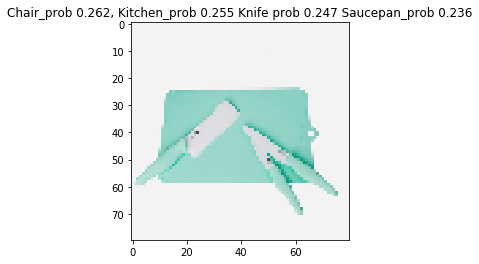

In [50]:
# A SAUCEPAN
plt.imshow(np.array(test_x[0]))
plt.title("Chair_prob %s, Kitchen_prob %s Knife prob %s Saucepan_prob %s" %(round(chair_prob,3) ,round(kitchen_prob,3) ,round(knife_prob,3),round(saucepan_prob,3)))

# Making prediction for first 16 test images

In [51]:
with tf.Session() as session:
    saver.restore(session, "CNN_MC.ckpt")
    print("Model restored.") 
    print('Initialized')
    k = session.run([y_pred], feed_dict={x:test_x[0:16] , hold_prob1:1,hold_prob2:1,hold_prob3:1,hold_prob4:1})

INFO:tensorflow:Restoring parameters from CNN_MC.ckpt
Model restored.
Initialized


In [55]:
np.array(k).shape

(1, 16, 4)

In [56]:
#Reshaping k
k = np.array(k).reshape(16,4)

In [57]:
k[0]

array([0.14639977, 0.12047687, 0.08659527, 0.04386071], dtype=float32)

In [60]:
pred_labels = []

In [61]:
for i in range(16):
    r = np.round(np.array(np.exp(k[i])/sum(np.exp(k[i]))),3).argmax()
    if r ==0 : pred_labels.append("chair")
    elif r ==1: pred_labels.append("kitchen")
    elif r ==2: pred_labels.append("knife")
    elif r ==3: pred_labels.append("saucepan")

In [65]:
#Multiple images parameters
w=80
h=80
columns = 4
rows = 4

In [66]:
images = test_x[:16]

In [67]:
images.shape

(16, 80, 80, 3)

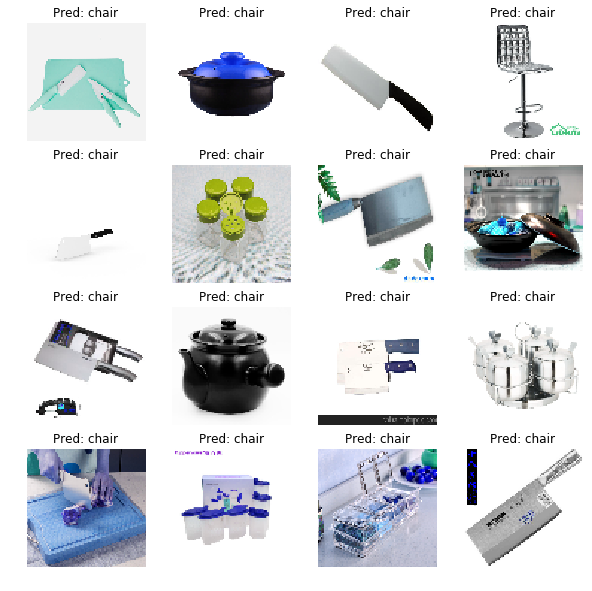

In [69]:
fig = plt.figure(figsize=(10, 10))
for m in range(1, columns*rows +1):
    img = images[m-1].reshape([80, 80, 3])
    fig.add_subplot(rows, columns, m)
    plt.imshow(img)
    plt.title("Pred: " + pred_labels[m-1])
    plt.axis('off')
plt.show()